<a href="https://colab.research.google.com/github/Hjhirp/Digital-Image-Processing-and-Analysis/blob/main/Lab11/DIPA_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage.io as io
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = io.imread('/content/fig3.24.jpg')

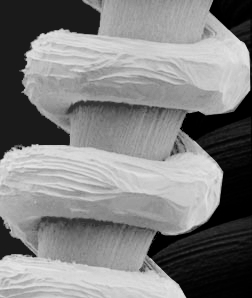

In [ ]:
cv2_imshow(img)

In [ ]:
def conv(i,j,img,s=3): #calc local mean
  m,n = img.shape
  x = i-s//2
  y = j-s//2
  if x>=0 and y>=0 and (i+s)//2<m and (j+s)//2<n:
    s1 = np.average(img[x:i+s//2,y:j+s//2].flatten())
    s2 = np.std(img[x:i+s//2,y:j+s//2].flatten())
    # print('outermost',s1)
    # for i1 in range(x,(i+s)//2+1):
    #   for j1 in range(y,(j+s)//2+1):
    #     s1=img[i1][j1]

    return (s1,s2)


In [ ]:
#std range
list_ = []
for i in range(m):
  for j in range(n):
    local = conv(i,j,img)
    if local != None:
      list_.append(local[1])

list_ = pd.DataFrame(list_)
list_.describe()

,0
count,74547.000000
mean,4.134866
std,7.277147
min,0.000000
25%,0.866025
50%,2.179449
75%,4.493050
max,89.284307


global mean  128.1150527325024


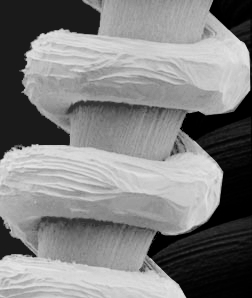

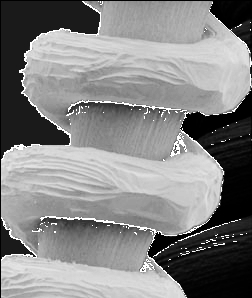

In [ ]:
m,n = img.shape

# factor= float(input('Enter the factor of scaling:'))
factor = 25
std_thresh_low = 10
std_thresh_high = 80

global_mean = np.average(img.flatten())
print('global mean ',global_mean)

max_ = np.max(img.flatten())
min_ = np.min(img.flatten())

range_ = max_-min_

img_new = np.zeros((m,n))
for i in range(m):
  for j in range(n):
    local = conv(i,j,img)
    if local != None:
      # print(local[1])
      if local[0] < global_mean and std_thresh_low < local[1] < std_thresh_high:
        img_new[i][j] = factor*img[i][j]
        # print(img[i][j],img_new[i][j])
      else:
        img_new[i][j] = img[i][j]

cv2_imshow(img)
cv2_imshow(img_new)